In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *
from scripts.mane_utils import *

In [2]:
config_file = '../snakemake/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
m_swan_file = '../'+expand(config['data']['sg'], species='mouse')[0]


In [4]:
sg = swan.read(m_swan_file)

Read in graph from ../data/mouse/swan_graph.p


In [10]:
# only cortex data
sg.adata = sg.adata[sg.adata.obs.loc[sg.adata.obs.general_tissue_cell_type=='cortex'].index, :].copy()
sg.adata.obs
sg.adata.obs.age = sg.adata.obs[['age']].fillna('Unknown')
sg.adata.obs

,dataset,total_counts,ENCODE_file_id,ENCODE_experiment_id,sample,sample_display,general_tissue_cell_type,fig1_tissue_label,age,adult,sex,genotype,tissue_or_cell_line,sample_color_hex_code,matching_human_samples,reads_post_talon
index,,,,,,,,,,,,,,,,
cortex_18-20mo_m_1,cortex_18-20mo_m_1,816172.0,ENCFF691BND,ENCSR628IMW,cortex_18-20mo,Cortex PNM18-20,cortex,cortex,18-20mo,True,m,b6/cast,tissue,#7c5290,"['brain', 'pgp1_excite_neuron', 'pgp1_astro']",1187511
cortex_wt_f_1_1,cortex_wt_f_1_1,1639318.0,ENCFF505EPC,ENCSR131CES,cortex,Cortex,cortex,cortex,Unknown,True,f,b6n,tissue,#634273,"['brain', 'pgp1_excite_neuron', 'pgp1_astro']",2016725
cortex_18-20mo_m_2,cortex_18-20mo_m_2,817329.0,ENCFF603QTD,ENCSR628IMW,cortex_18-20mo,Cortex PNM18-20,cortex,cortex,18-20mo,True,m,b6/cast,tissue,#7c5290,"['brain', 'pgp1_excite_neuron', 'pgp1_astro']",1118251
cortex_5x_f_1_1,cortex_5x_f_1_1,1633550.0,ENCFF211JXU,ENCSR280VKU,cortex,Cortex,cortex,cortex,Unknown,True,f,5xfad,tissue,#634273,"['brain', 'pgp1_excite_neuron', 'pgp1_astro']",1976211
cortex_wt_f_1_2,cortex_wt_f_1_2,1854086.0,ENCFF525AQR,ENCSR131CES,cortex,Cortex,cortex,cortex,Unknown,True,f,b6n,tissue,#634273,"['brain', 'pgp1_excite_neuron', 'pgp1_astro']",2259132
cortex_wt_m_2_2,cortex_wt_m_2_2,2227137.0,ENCFF149EOM,ENCSR644GDT,cortex,Cortex,cortex,cortex,Unknown,True,m,b6n,tissue,#634273,"['brain', 'pgp1_excite_neuron', 'pgp1_astro']",2740617
cortex_wt_m_2_1,cortex_wt_m_2_1,2081288.0,ENCFF405HLV,ENCSR644GDT,cortex,Cortex,cortex,cortex,Unknown,True,m,b6n,tissue,#634273,"['brain', 'pgp1_excite_neuron', 'pgp1_astro']",2538854
cortex_14d_f_1,cortex_14d_f_1,794237.0,ENCFF647URO,ENCSR631KNS,cortex_14d,Cortex PND14,cortex,cortex,14d,True,f,b6/cast,tissue,#c7b5cf,"['brain', 'pgp1_excite_neuron', 'pgp1_astro']",1087280
cortex_14d_m_1,cortex_14d_m_1,565370.0,ENCFF254GFU,ENCSR791JQO,cortex_14d,Cortex PND14,cortex,cortex,14d,True,m,b6/cast,tissue,#c7b5cf,"['brain', 'pgp1_excite_neuron', 'pgp1_astro']",782521


In [ ]:
sg

In [25]:
sg.adata.obs.genotype.unique()

['b6/cast', 'b6n', '5xfad']
Categories (3, object): ['5xfad', 'b6/cast', 'b6n']

In [26]:
import met_brewer

{0: '#2b9b81', 1: '#fe9b00', 2: '#f4c40f'}


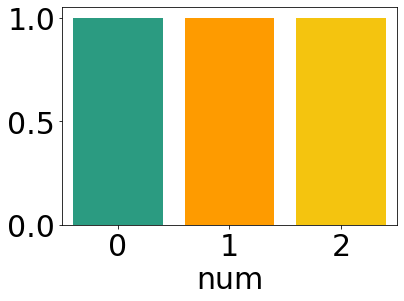

In [27]:
df = pd.DataFrame()
df['color'] = met_brewer.met_brew("Signac", n=3, brew_type="discrete")
df['num'] = df.index.tolist()
cmap = dict([(num, color) for num, color in zip(df.num.tolist(), df.color.tolist())])
print(cmap)
sns.barplot(df, y=[1 for i in range(len(df.index))], x='num', palette=cmap, saturation=1)

In [28]:
g_cmap = {'b6/cast':cmap[0],
          'b6n':cmap[1],
          '5xfad':cmap[2]}


In [29]:
sg.adata.obs.age.unique()

['18-20mo', 'Unknown', '14d', '2mo']
Categories (4, object): ['14d', '18-20mo', '2mo', 'Unknown']

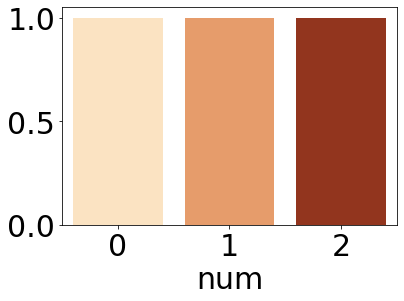

In [30]:
order = ['14d', '2mo', '18-20mo', 'Unknown']
df = pd.DataFrame()
df['color'] = met_brewer.met_brew("OKeeffe2", n=len(order)-1, brew_type="continuous")
df['num'] = df.index.tolist()
cmap = dict([(num, color) for num, color in zip(df.num.tolist(), df.color.tolist())])
sns.barplot(df, y=[1 for i in range(len(df.index))], x='num', palette=cmap, saturation=1)
a_cmap = dict()
for i,t in enumerate(order):
    if t == 'Unknown':
        a_cmap[t] = '#808080'
    else:
        a_cmap[t] = cmap[i]

In [31]:
sg.set_metadata_colors('genotype', g_cmap)
sg.set_metadata_colors('age', a_cmap)

In [33]:
g = 'Apoe'
metadata_cols = ['genotype', 'age']
datasets = {'genotype': sg.adata.obs.genotype.unique()}
sg.gen_report(g,
              f'figures/{g}_',
              novelty=True,
              cmap='viridis',
              indicate_novel=True,
              transcript_col='tname',
              metadata_cols=metadata_cols,
              datasets=datasets)
sg.gen_report(g,
          f'figures/{g}_',
          novelty=True,
          cmap='magma',
          transcript_col='tname',
          browser=True,
          layer='pi',
          metadata_cols=metadata_cols,
          datasets=datasets)



Plotting transcripts for ENSMUSG00000002985
Saving transcript path graph for ENSMUSG00000002985[2,3,2] as figures/Apoe__novel_ENSMUSG00000002985[2,3,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[1,1,2] as figures/Apoe__novel_ENSMUSG00000002985[1,1,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,6,2] as figures/Apoe__novel_ENSMUSG00000002985[2,6,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,13,2] as figures/Apoe__novel_ENSMUSG00000002985[2,13,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,11,2] as figures/Apoe__novel_ENSMUSG00000002985[2,11,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,3,1] as figures/Apoe__novel_ENSMUSG00000002985[2,3,1]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,15,2] as figures/Apoe__novel_ENSMUSG00000002985[2,15,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,5,2] as figures/Apoe__novel_ENSMUSG00000002985[2,5,2]_path.png
Saving transc